#### ***KELOMPOK 6 :***


*   MUHAMMAD ADE SULISTIANSYAH - 103102400045
*   RETNO EKA SARI - 103102400046
*   VINCENT BERWYN - 103102400017
*   YOAN NATASYA AGUSTIN SEBASTIAN - 103102430001





**LOAD DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path_data = '/content/data/'

In [ ]:
data = pd.read_csv(path_data+"student_performance_updated_1000.csv",index_col='StudentID', parse_dates=True)

/tmp/ipython-input-731959606.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(path_data+"student_performance_updated_1000.csv",index_col='StudentID', parse_dates=True)


**DATABASE DESCRIPTION**

In [ ]:
data.shape

(1000, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1.0 to 8021.0
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       966 non-null    object 
 1   Gender                     952 non-null    object 
 2   AttendanceRate             960 non-null    float64
 3   StudyHoursPerWeek          950 non-null    float64
 4   PreviousGrade              967 non-null    float64
 5   ExtracurricularActivities  957 non-null    float64
 6   ParentalSupport            978 non-null    object 
 7   FinalGrade                 960 non-null    float64
 8   Study Hours                976 non-null    float64
 9   Attendance (%)             959 non-null    float64
 10  Online Classes Taken       975 non-null    object 
dtypes: float64(7), object(4)
memory usage: 93.8+ KB


In [ ]:
data.columns

Index(['Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade', 'Study Hours', 'Attendance (%)', 'Online Classes Taken'],
      dtype='object')

In [ ]:
data.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
StudentID,,,,,,,,,,,
1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [ ]:
data.tail()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
StudentID,,,,,,,,,,,
NaN,Kenneth Murray,Male,85.0,20.0,NaN,1.0,High,72.0,0.8,80.0,True
4497.0,Amy Stout,Female,91.0,NaN,86.0,0.0,High,90.0,3.9,80.0,True
1886.0,NaN,Male,85.0,8.0,82.0,2.0,Low,68.0,0.4,54.0,False
7636.0,Joseph Sherman,Male,88.0,17.0,60.0,2.0,High,85.0,0.9,53.0,True
8021.0,Maria Walls,Female,88.0,10.0,90.0,1.0,Medium,NaN,2.4,94.0,True


**Cek nilai duplikat, nilai unik**

In [ ]:
data_nama = data.groupby('Name').size()
nama_duplikat = data_nama[data_nama > 1]
nama_duplikat

,0
Name,
andrea frey,36
anthony smith,2
erica miller,2
kimberly harrison,2


In [ ]:
data.nunique()


,0
Name,962
Gender,2
AttendanceRate,9
StudyHoursPerWeek,10
PreviousGrade,10
ExtracurricularActivities,4
ParentalSupport,3
FinalGrade,10
Study Hours,52
Attendance (%),52


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated()


,0
StudentID,
1.0,False
2.0,False
3.0,False
4.0,False
5.0,False
...,...
NaN,False
4497.0,False
1886.0,False


#### **Visualisasikan jumlah nilai unik**

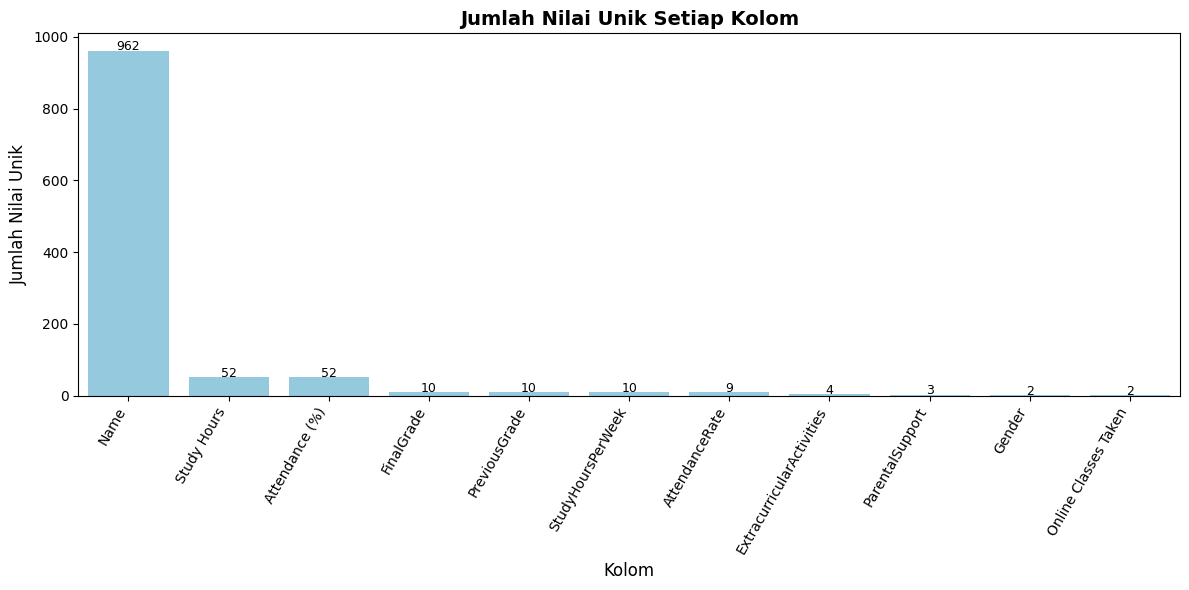

In [ ]:
unique_counts = data.nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, color="skyblue")

plt.title("Jumlah Nilai Unik Setiap Kolom", fontsize=14, fontweight='bold')
plt.xlabel("Kolom", fontsize=12)
plt.ylabel("Jumlah Nilai Unik", fontsize=12)

plt.xticks(rotation=60, ha='right')

for i, v in enumerate(unique_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

#### **Menemukan null values**

In [ ]:
data.isnull().sum()

,0
Name,34
Gender,48
AttendanceRate,40
StudyHoursPerWeek,50
PreviousGrade,33
ExtracurricularActivities,43
ParentalSupport,22
FinalGrade,40
Study Hours,24
Attendance (%),41


#### **replace semua null values**

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)


/tmp/ipython-input-461875126.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-461875126.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
data.isnull().sum()

,0
Name,0
Gender,0
AttendanceRate,0
StudyHoursPerWeek,0
PreviousGrade,0
ExtracurricularActivities,0
ParentalSupport,0
FinalGrade,0
Study Hours,0
Attendance (%),0


**MENGETAHUI TIPE DATA DARI DATASET YANG SEDANG DIEKSPLORASI UNTUK MEMPERMUDAH PROSES**

In [ ]:
data.dtypes

,0
Name,object
Gender,object
AttendanceRate,float64
StudyHoursPerWeek,float64
PreviousGrade,float64
ExtracurricularActivities,float64
ParentalSupport,object
FinalGrade,float64
Study Hours,float64
Attendance (%),float64


**FILTER DATA**

In [ ]:
dFiltered = data[data['ParentalSupport'] == 'High']
dFiltered.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
StudentID,,,,,,,,,,,
1.0,John,Male,85.0,15.0,78.0,1.0,High,80.000000,4.8,59.0,False
4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.000000,2.9,96.0,False
6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,80.030208,2.8,97.0,False
10.0,Isabella,Female,91.0,22.0,86.0,3.0,High,88.000000,2.9,59.0,True
2824.0,Shannon Harrison,Male,88.0,25.0,90.0,0.0,High,87.000000,3.4,84.0,True


**VISUALISASI DENGAN BOX PLOT**

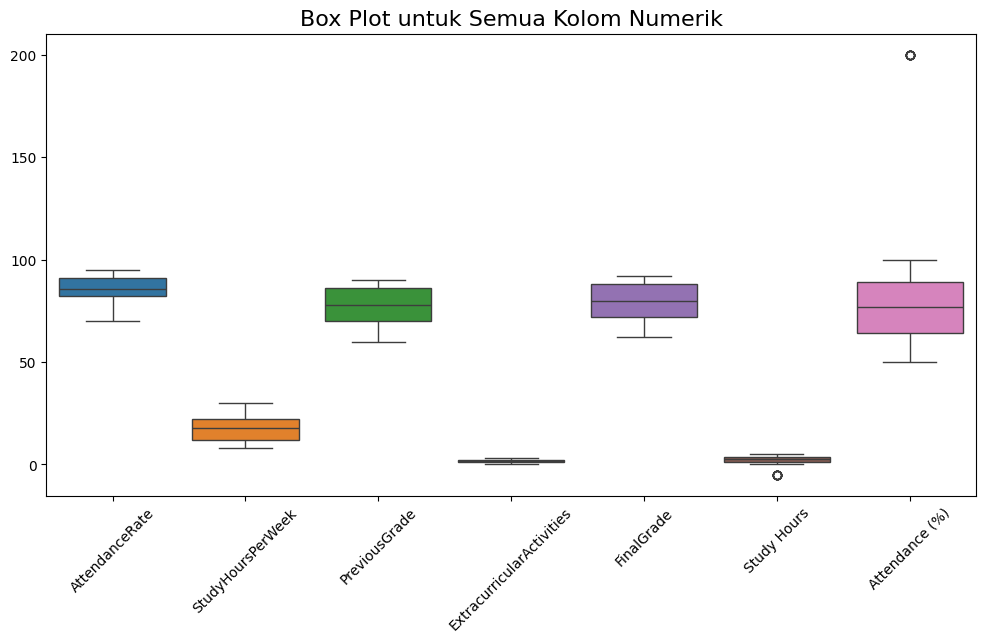

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data.select_dtypes(include=["number"]))
plt.title("Box Plot untuk Semua Kolom Numerik", fontsize=16)
plt.xticks(rotation=45)
plt.show()

**VISUALISASI CORRELATION DENGAN HEATMAP**

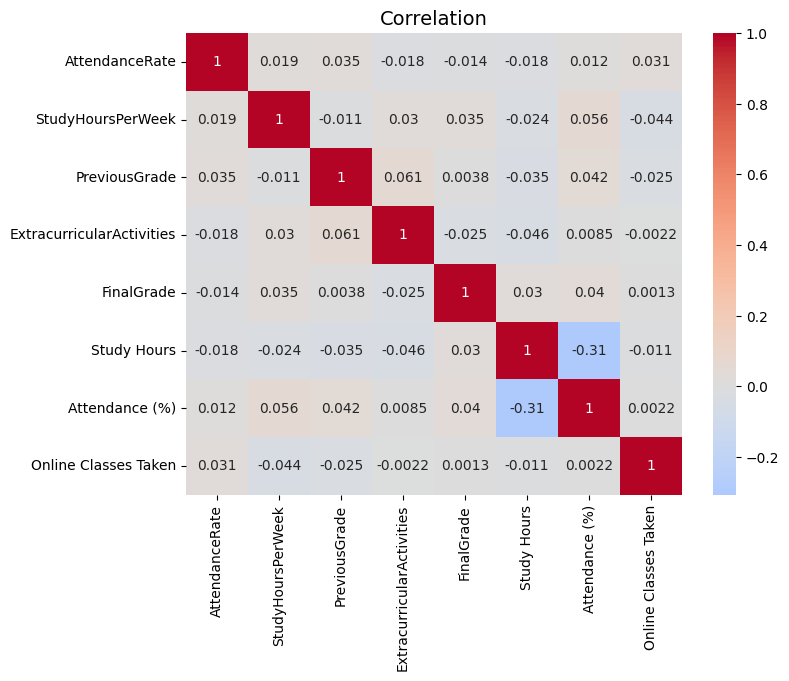

In [ ]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation", fontsize=14)
plt.show()